## 01. 분류의 개요

지도학습의 대표적 유형인 분류는 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 새로운 데이터 값이 주어졌을때 미지의 레이블 값을 예측하는 것이다.
우리는 분류에 사용되는 다양한 머신러닝 알고리즘 중 앙상블 방법에 대해서 이번 장에서 공부할 것이다.
앙상블 방법은 정형 데이터의 예측 분석 영역에서 많이 애용되고 있으며 일반적으로는 배깅과 부스팅 방식으로 나뉜다. 

배깅의 경우 대표적으로 랜덤 포레스트, 부스팅의 경우 대표적으로 그래디언트 부스팅과 같은 알고리즘이 존재한다. 

Decision Tree는 쉽고 유연하며, 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적다. 하지만, 복잡한 규칙 구조를 가지고 있어 이로 인한 과적합 문제가 발생할 가능성이 존재한다. 

## 02. 결정 트리

결정트리는 ML알고리즘 중 직관적인 이해가 쉽다는 장점을 가지는 알고리즘이다. 
- 규칙노드(Decision Node)
- 리프노드(Leaf Node)
- 서브트리(Sub Tree)
등에 대해 명확한 개념을 파악하고 있어야 하며, 여기서 중요한 것은 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능을 저하될 가능성이 높다는 것이다. 

앞에서 트리의 깊이는 예측 성능에 영향을 줄 수 있다고 하였습니다. 그렇다면, 리프노드나 규칙노드, 서브트리의 수 증가는 트리의 깊이와도 상관관계를 가질 수 있다고 생각할 수 있습니다.
우리는 그렇다면, 가능한 한 적은 결정 노드로 높은 예측 정확도를 가지기 위해 최대한 균일한 데이터 세트를 분할할 수 있도록 알고리즘을 설계해야 할 것입니다.

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듭니다. 이 과정에서 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 Information gain지수와 지니계수가 있습니다.

우리가 기억하면 좋을 것은, IG는 1에서 엔트로피(혼잡도를 의미) 지수를 뺀 값입니다. 따라서 IG가 높은 속성을 기준으로 분할하게 됩니다.
지니 계수는 0이 가장 평등, 1로 갈수록 불평등합니다. 따라서 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석합니다.

결정트리(Decision Tree)의 경우, 정보의 균일도만 신경쓰면 되기 때문에 피처의 스케일링, 정규화 같은 전처리 작업이 대부분 필요없지만 과적합으로 인한 정확도가 떨어진다는 단점이 존재합니다. 따라서 결정트리의 파라미터를 통해 이를 해결할 수 있습니다.

다음 파라미터에 대해 알아보고 넘어가도록 하겠습니다.
- min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수. defalut는 2이지만 작게 설정하면 과적합 가능성이 증가한다.
- min_samples_leaf : leaf가 되기 위한 최소한의 샘플 데이터 수. 과적합 제어 용도로 사용된다. 하지만 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정이 필요하다.
- max_features : 최적의 분할을 위해 고려할 최대 피처의 수.
- max_depth : 트리의 최대 깊이를 규정한다. 깊이가 깊어지면 과적합의 가능성이 증가한다.
- max_leaf_nodes : leaf의 최대 개수.
    

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state = 156)
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names, 
                feature_names = iris_data.feature_names, impurity = True, filled = True)

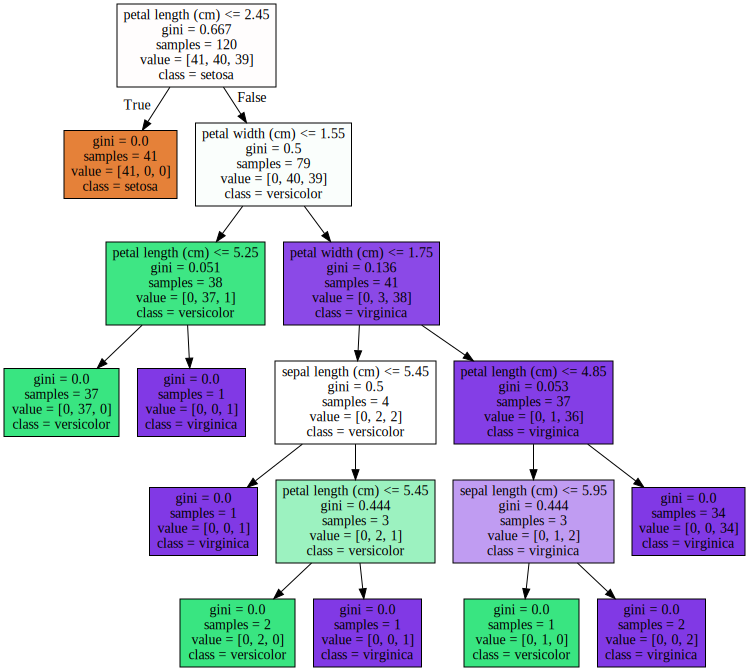

In [3]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

다음을 통해 
1. 우리는 각 노드에서 어떠한 것이 규칙노드인지, 리프노드인지 등을 파악할 수 있다.
2. 어떠한 규칙조건을 통해 분류되었는지 알 수 있다.
3. 지니계수, IG값 중 어떠한 것을 기준으로, 계수 값은 어떠한지 알 수 있다.
4. 샘플의 수를 파악할 수 있고 value별 데이터 수 파악가능
5. 최종 결정된 class 파악가능

Feature importance:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


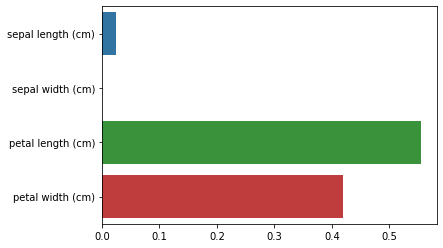

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

print('Feature importance:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print("{0} : {1:.3f}".format(name, value))

sns.barplot(x=dt_clf.feature_importances_, y = iris_data.feature_names)

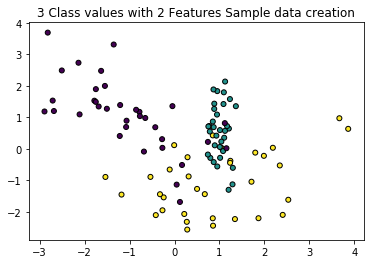

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3,
                                          n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s= 25, edgecolors='k')

## make_classification의 파라미터들 아직 이해못함 1!!!!

In [6]:
X_features.shape

(100, 2)

In [7]:
X_features[:, 0].shape

(100,)

In [8]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

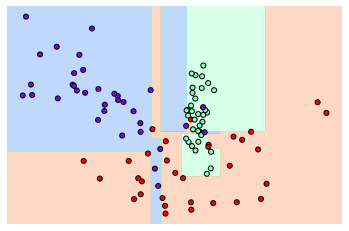

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

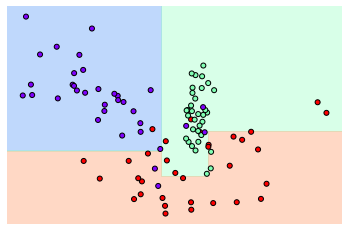

In [10]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이를 통해 트리 생성에 있어서 min_samples_leaf과 같이 제약을 들게 됨으로써 학습 데이터에만 지나치게 최적화된 분류 기준을 완화하여 테스트 데이터 세트의 정확도를 향상시켰다.

## 결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('human_activity/features.txt', sep = '\s+', header = None, 
                              names = ['column_index', 'column_name'])

feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


features.txt파일을 보면, 공백을 기준으로 561개의 피처가 분리되어 있음을 알 수 있다. 따라서 피처 인덱스와 피처명을 공백을 기준으로 분리하여 전체 피처명에서 10개만 추출하는 작업을 진행하였다.

In [12]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


feature_name_df를 column_name을 기반으로 groupby하고 이를 count()함으로써 중복된 피처명이 몇개나 존재하는지를 알 수 있다.
1이상의 중복된 값을 가진 피처명들을 count()함으로써 총 개수를 파악하면 42개의 중복 피처명이 존재한다는 것을 알 수 있다.

In [13]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [14]:
feature_name_df.reset_index()

,index,column_index,column_name
0,0,1,tBodyAcc-mean()-X
1,1,2,tBodyAcc-mean()-Y
2,2,3,tBodyAcc-mean()-Z
3,3,4,tBodyAcc-std()-X
4,4,5,tBodyAcc-std()-Y
...,...,...,...
556,556,557,"angle(tBodyGyroMean,gravityMean)"
557,557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,558,559,"angle(X,gravityMean)"
559,559,560,"angle(Y,gravityMean)"


In [15]:
aa = pd.DataFrame(data=feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt']).reset_index()
aa

,index,dup_cnt
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
556,556,0
557,557,0
558,558,0
559,559,0


In [16]:
ab = pd.merge(feature_name_df.reset_index(), aa, how='outer')
ab

,index,column_index,column_name,dup_cnt
0,0,1,tBodyAcc-mean()-X,0
1,1,2,tBodyAcc-mean()-Y,0
2,2,3,tBodyAcc-mean()-Z,0
3,3,4,tBodyAcc-std()-X,0
4,4,5,tBodyAcc-std()-Y,0
...,...,...,...,...
556,556,557,"angle(tBodyGyroMean,gravityMean)",0
557,557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,558,559,"angle(X,gravityMean)",0
559,559,560,"angle(Y,gravityMean)",0


In [17]:
ab['column_name'] = ab[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
ab['column_name'].values.tolist()

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [18]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

위에는 지금 2개의 함수가 정의되어 있다.<br>
우리는 get_human_dataset()이 정의되면 X_train, X_test, y_train, y_test 총 4개의 결과값이 나온다는 사실을 미리 알 수 있다.<br>

-get_human_dataset()함수<br>
1. features.txt파일에서 공백을 기준으로 column_index와 column_name을 호출받음. 이를 feature_name_df로 저장
2. 중복된 피처명을 수정하는 get_new_feature_name_df()를 호출, feature_name_df가 인자로 할당. 결과값은 new_feature_name_df로 저장.

    -get_new_feature_name_df()함수<br>
    1. feature_name_df를 재가공하여 column에는 'dup_cnt'를, column_name을 기준으로 누적count값이 나타나 있는 df형태 결과값이 나온다.
    2. reset_index()를 통해 index컬럼을 df에 추가함.
    3. old_feature_name_df.reset_index(), feature_dup_df를 outer join함으로써 new_feature_name_df를 생성
    4. column_name에 _1또는 _2를 추가함으로써 새로운 피처명을 할당
    5. 불필요한 index컬럼을 drop
    6. new_feature_name_df를 return함.
    <br>
3. new_feature_name_df의 피처명을 다시 리스트로 변환
4. 컬럼명을 적용, 반환

In [19]:
print('## 학습 피처 데이터 셋 info()')
print(X_train.info())

## 학습 피처 데이터 셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [20]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


다음을 통해 피처가 모두 float형의 숫자형으로 이루어져 있고 별도의 인코딩이 필요없음을 알 수 있다.<br>
또한, 레이블 값은 1부터 6까지 고르게 분포되어 있음을 알 수 있다.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

print('DecisionTreeClassifier 기본 하이퍼 파라미터 :\n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 :
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


85%의 정확도를 확인할 수 있었고, 기본 하이퍼 파라미터에 대한 정보들을 확인할 수 있었다. 이후에는 하이퍼 파라미터를 설정하면서 어떠한 정확도 변동이 있는지를 살펴볼 계획이다.

In [22]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV cv 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.6min finished


GridSearchCV cv 최고 평균 정확도 수치 : 0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


gridSearchCV를 통해 max_depth값 7개를 변환시키면서 어떠한 max_depth값에서 정확도 수치가 가장 높은지, 당시 하이퍼 파라미터 값은 어떠한지를 파악할 수 있었다.ㅡ

In [23]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


GridSearchCV 객체의 cv_results_속성은 CV세트에 하이퍼 파라미터를 순차적으로 입력했을 때의 성능 수치를 가지고 있다. <br>
따라서 이 중 우리가 필요로 하는 정보인 param_max_depth와 mean_test_score를 출력한다.

In [25]:
max_depth = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state = 156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도 {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도 0.8558
max_depth = 8 정확도 0.8707
max_depth = 10 정확도 0.8673
max_depth = 12 정확도 0.8646
max_depth = 16 정확도 0.8575
max_depth = 20 정확도 0.8548
max_depth = 24 정확도 0.8548


max_depth가 8일때 그 정확도가 가장 높음을 for문을 통해 알 수 있었다. 깊이가 깊어질수록 과적합의 영향력이 커지기 때문에 깊이 제어가 필요하다.

In [29]:
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv= 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.1min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_split': 16}


max_depth가 8일때, min_samples_split이 16일떄 가장 좋은 정확도를 보이고 있다.

In [30]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


max_depth가 8, min_samples_split이 16으로 학습된 완료된 Estimator객체를 통해 테스트 데이터 세트의 예측을 수행할 수 있다.

## 03. 앙상블 학습

앙상블 학습은 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법을 말한다.<br>
이는 정형 데이터에서 강점을 보이는데, 크게 보팅, 배깅, 부스팅으로 나누어 설명할 수 있다.<br>
보팅(Voting)의 경우 하드 보팅과 소프트보팅으로 크게 나뉘는데, 서로 다른 알고리즘을 가진 분류기를 결합하는 방식을 취한다. 소프트 보팅이 대게 정확도가 높기 때문에 선호되고 있다. <br>
배깅(Bagging)의 경우 같은 유형의 알고리즘을 기반으로하되, 데이터 샘플링을 다르게 가져가면서 학습을 수행한다. 대표적으로 랜덤 포레스트가 있다.<br>
부스팅의 경우, 다음 분류기에 가중치(weight)를 부여하면서 학습과 예측을 진행한다. 대표적으로는 그래디언트 부스트, XGBoost, LightGBM이ㅡ 있다. 

In [26]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


보팅의 경우, 여러 개의 분류기를 가지고 학습하기 때문에 로지스틱회귀와 K최근접이웃이 import되었음을 알 수 있다. 

In [27]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()

vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0}정확도:{1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도:0.9474
LogisticRegression정확도:0.9386
KNeighborsClassifier정확도:0.9035


이를 통해 로지스틱회귀와 K최근접이웃 각각의 Classifier의 정확도보다 소프트보팅의 정확도가 더 좋음을 알 수 있다.

## 04. 랜덤 포레스트

- 앞에서 우리는 배깅의 대표적인 알고리즘으로 랜덤 포레스트가 있다고 하였다. 우리가 여기서 기억하면 좋을 것은, 랜덤 포레스트는 DecisionTree를 기반 알고리즘으로 가지고 있다는 점
- 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 된다는 것이다.
- 또한, 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트이다. 이를 부트스트래핑(bootstrapping)이라 한다. 

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도 : 0.9253


랜덤 포레스트의 정확도가 약 92.53%임을 확인할 수 있다.

In [29]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20],
}

rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 : 
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도:0.9180


GridSearchCV를 통해 최적 하이퍼 파라미터에 대한 값을 확인할 수 있었다.<br>
n_estimators를 300으로 증가시키고, 최적화 하이퍼 파라미터로 다시 RandomForestClassifier를 학습시킨 뒤에 별도의 데이터 세트에서 예측 성능을 측정해 보겠다.

In [30]:
rf_clf1 = RandomForestClassifier(n_estimators = 300, max_depth = 10, min_samples_leaf = 8, 
                                 min_samples_split = 8, random_state = 0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도:0.9165


## 05. GBM

우리는 앞서 부스팅 알고리즘의 경우 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식이라고 언급하였다.
부스팅의 대표적인 구현으로는 AdaBoost와 그래디언트 부스트가 있다. <br>
우리가 여기서 기억해야할 부분은, GBM은 AdaBoost와 유사하나, 가중치 업데이트를 하는 방식에 경사 하강법이 이용된다는 것이다. <br>
경사하강법의 경우, 반복 수행을 통해 오류 값(실제값 - 예측값)을 최소화활 수 있도록 가중치의 업데이트 값을 도출하는 기법으로 이해할 수 있다.

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM정확도 : {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간 : {0:.1f}초'.format(time.time() - start_time))

KeyboardInterrupt: 

하이퍼 파라미터 값을 특별하게 설정하지 않았음에도 불구하고 랜덤 포레스트보다 좋은 예측 성능을 보였다. 하지만, 수행 시간이 오래 걸린다는 단점이 존재하고 있다.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 500],
    'learning_rate' : [0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf, param_grid = params, cv = 2, verbose = 1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도 : {0:4f}'.format(gb_accuracy))

## 06. XGBOOST

XGBOOST의 경우, 앞서 설명한 GBM에 기반하고 있지만 느린 수행시간의 단점 및 과적합 규제 부재 등의 문제를 해결하고 있기 때문에 많은 곽광을 받고 있다.

우리가 주의해야 할 것은, 파이썬 래퍼 XGBoost모듈과 사이킷런 래퍼XGBoost모듈의 일부 하이퍼 파라미터가 약간 다르다는 것이다. 정확하게는 범용화된 이름 규칙에 따라 파라미터 명이 다르게 설정되어 있다. 우리는 파이썬 래퍼를 우선적으로 알아볼 것이다.

In [32]:
import xgboost as xgb
from xgboost import XGBClassifier

파이썬 래퍼 XGBoost의 하이퍼 파라마티는 (일반 파라미터/부스터 파라미터/학습 태스크 파라미터)로 구성된다. 대부분의 하이퍼 파라미터는 Booster 파라미터에 속한다.

주요 부스터 파라미터에 대해 몇가지 기술해보겠다.
- eta : GBM의 학습률(learning rate)와 같은 파라미터이다. 0에서 1사이의 값을 지정한다. 보통은 0.01~0.2사이의 값이 선호횐다.
- num_boost_rounds : GBM의 n_estimator와 같은 파라미터이다. 
- min_child_weight : 트리에서 추가적으로 가지를 나눌지에 대해 결정하기 위해 필요한 데이터들의 weight 총합이다. 과적합을 조절하는데 사용된다.
- gamma : 트리의 리프 노드를 추가적으로 나눌지를 결정하는 최소 손실 감소 값이다. 따라서 해당 값보다 큰 손실(loss)이 감소된 경우에는 리프 노드를 분리한다. 값이 클수록 과적합 감소 효과가 있다.

우리는 과적합 문제가 심각하다면 eta값을 낮춤과 동시에 num_round(n_estimator)를 높여줄 수 있고, max_depth를 낮출 수 있다. 또한 min_child_weight를 높이고 gamma값을 높일 수 있다.

XGBoost의 경우에는 조기 중단(Early Stopping)기능이 있기 때문에 예측 오류가 더 이상 개선되지 않으면 반복을 끝까지 수행하지 않고 중지해 수행 시간을 개선할 수 있다.

In [33]:
import xgboost
print(xgboost.__version__)

0.90


In [34]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


target레이블 값의 종류는 악성인 malignant가 0, 양성인 benign이 1값으로 되어 있다. 

In [35]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


파이썬 래퍼 XGBoost의 사이킷런과 가장 큰 차이 중 하나는 학습용과 테스트용 데이터 세트를 위해 별도의 객체인 DMatrix를 생성한다는 점이다. DMatrix의 주요 입력 파라미터는 data와 label이다. 

In [37]:
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [38]:
params = {
    'max_depth' : 3,
    'eta' : 0.1,
    'objective' : 'binary:logistic',
    'eval_metric' : 'logloss',
    'early_stopping' : 100
}
num_rounds = 400

xgboost 학습을 수행하기 전에 먼저 하이퍼 파라미터를 설정하였다. 딕셔너리 형태로 이를 입력하게 된다. <br>

- max_depth, 트리의 최대 깊이를 3으로 설정
- eta(학습률)을 0.1로 설정하였음.
- 예제 데이터가 0 또는 1인 이진 분류이기 때문에 목적함수는 이진 로지스틱
- 오류 함수의 평가 성능 지표를 logloss로 설정
- 부스팅 반복 횟수를 400회로 지정

여기서 우리가 유의해야할 점은 파이썬 래퍼 XGBoosts는 하이퍼 파라미터를 xgboost 모듈의 train()함수에 파라미터로 전달한다는 것이다. <br>
사이킷런의 경우는 Estimator의 생성자를 하이퍼 파라미터로 전달하는데 반해 차이가 있다.

XGBoost는 수행 속도 개선을 위해 조기 중단 기능이 제공되고 있다. 이는 xgboost의 train()함수에 early_stopping_rounds 파라미터를 입력함으로써 설정된다. 우리는 조기 중단 최소 반복 횟수를 100으로 설정할 것이다. 

early_stopping_rounds파라미터를 설정해 조기중단을 수행하기 위해서는 '반드시' eval_set과 eval_metric이 함께 설정되어야 한다. <br>
eval_set은 성능 평가를 수행할 평가용 데이터 세트를 설정한다.

In [39]:
wlist = [(dtrain, 'trian'), (dtest, 'eval')]

xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = num_rounds,
                     early_stopping_rounds=100, evals = wlist)

[0]	trian-logloss:0.609688	eval-logloss:0.61352
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	trian-logloss:0.540803	eval-logloss:0.547842
[2]	trian-logloss:0.483753	eval-logloss:0.494247
[3]	trian-logloss:0.434457	eval-logloss:0.447986
[4]	trian-logloss:0.39055	eval-logloss:0.409109
[5]	trian-logloss:0.354145	eval-logloss:0.374977
[6]	trian-logloss:0.321222	eval-logloss:0.345714
[7]	trian-logloss:0.292592	eval-logloss:0.320529
[8]	trian-logloss:0.267467	eval-logloss:0.29721
[9]	trian-logloss:0.245153	eval-logloss:0.277991
[10]	trian-logloss:0.225694	eval-logloss:0.260302
[11]	trian-logloss:0.207937	eval-logloss:0.246037
[12]	trian-logloss:0.192184	eval-logloss:0.231556
[13]	trian-logloss:0.177916	eval-logloss:0.22005
[14]	trian-logloss:0.165222	eval-logloss:0.208572
[15]	trian-logloss:0.153622	eval-logloss:0.199993
[16]	trian-logloss:0.14333	eval-logloss:0.190118
[17]	trian-logl

train은 학습이 완료된 모델 객체를 반환한다.

학습이 반복수행되면서 train_error와 eval-logloss가 지속적으로 감소하고 있음을 볼 수 있다.
이 모델 객체는 예측을 위해 predict()메서드를 이용한다. 유의해야 하는 것은, 사이킷런의 predict()메서드는 예측 결과 클래스 값을 반환하지만, xgboost의 predict()는 예측 결과를 추정할 수 있는 확률 값을 반환한다는 것이다. 

따라서 본 예제에서는 이진분류이기 때문에 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측 값을 결정하는 로직을 추가한다.

In [40]:
pred_probs = xgb_model.predict(dtest)
print('predict()수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

print()

preds = [1 if x >0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict()수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]

예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [41]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
from sklearn.metrics import roc_auc_score
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9881


In [43]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

In [46]:
from sklearn.metrics import f1_score 

In [47]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)

    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [48]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


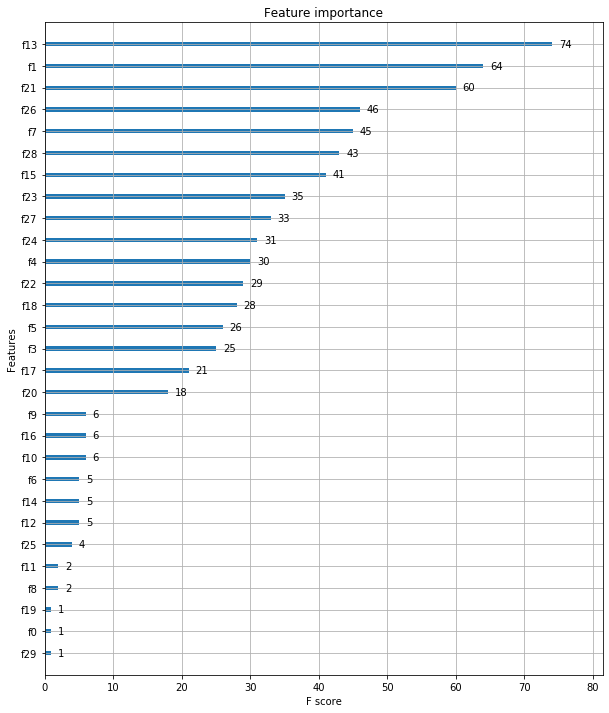

In [49]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(xgb_model, ax = ax)

사이킷런 전용의 XGBoost 래퍼 클래스는 사이킷런의 기본 Estimator를 그대로 상속해서 만들었기 때문에 다른 Estimator와 동일하게 fit()과 predict()만으로 학습과 예측이 가능하고, 다른 유틸리티를 그대로 사용할 수 있다.

파이썬 래퍼와 사이킷런 래퍼의 하이퍼 파라미터는 약간의 차이점이 있다고 설명하였는데, 이는 다음과 같다.
- eta -> learning_rate
- sub_sample -> subsample
- lambda - > reg_lambda
- alpha -> reg_alpha

In [50]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [51]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


In [52]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

In [53]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


In [55]:
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 10, eval_metric = 'logloss', eval_set = evals, verbose = True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


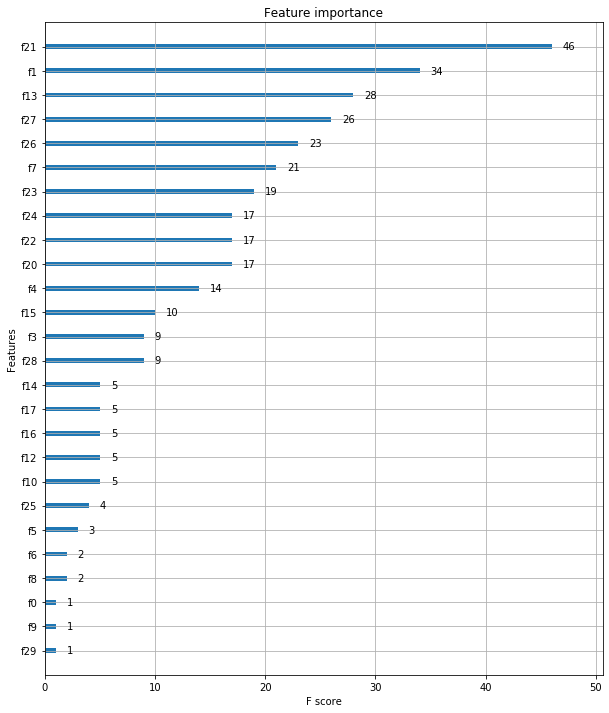

In [56]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(xgb_wrapper, ax = ax)

## 07. LightGBM

XGBoost와 부스팅 계열 알고리즘에서 각광을 받고 있는 LightGBM은 XGBoost에 비해 학습에 걸리는 시간이 훨씬 적다는 장점이 있다.<br>
동시에, 예측 성능은 별다른 차이가 존재하지 않는다. 하지만, 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉽다는 단점이 존재한다.

우리가 여기서 기억해야할 부분은 균형 트리 분할(Level Wise)가 아닌 리프 중심 트리 분할(Leaf Wise)이 사용된다는 것이다. 최대손실값을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성된다. 하지만, 결국은 균형 트리 분할 방식보다 예측 오류 손실을 최소화할 수 있다는 것이 LightGBM의 구현 사상이다.  

XGBoost에서 사용한 위스콘신 유방암 데이터 세트를 이용해 LightGBM으로 예측해보자.

In [62]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size = 0.2, random_state = 156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric = 'logloss', 
                eval_set = evals, verbose = True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

IndexError: too many indices for array

In [64]:
preds

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [65]:
pred_proba

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [63]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 1 76]]
정확도: 0.9561, 정밀도: 0.9500, 재현율: 0.9870,    F1: 0.9682, AUC:0.9395


n_estimator는 XGBoost와 동일하게 설정하고, 조기중단기능을 넣었음을 확인할 수 있다. 
정확도는 95%로 측정되나, 학습데이터 세트와 테스트 데이터 세트 크기가 작기 때문에 XGBoost와의 알고리즘 간 성능 비교는 큰 의미가 없다.

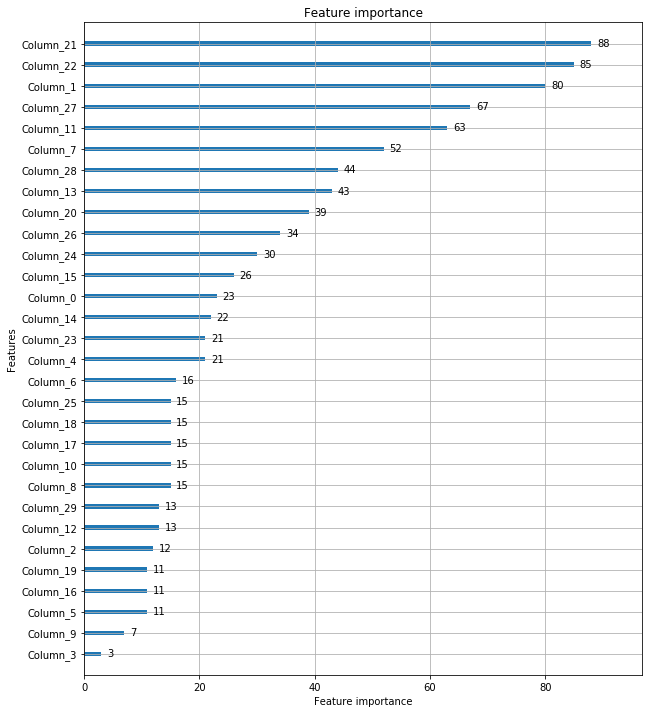

In [67]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fit, ax = plt.subplots(figsize = (10, 12))
plot_importance(lgbm_wrapper, ax=ax)

## 08. 분류 실습 - 캐글 산탄데르 고객 만족 예측

이번에는 캐글 산탄데르 고객 만족 데이터 세트에 대해서 고객 만족 여부를 XGBoost와 LightGBM을 활용해 예측해보겠다.
클래스 레이블 명은 TARGET이며, 1이면 불만을 가진 고객, 0이면 만족한 고객이다.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv('datasets/santander/train_santander.csv', encoding = 'latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head()

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


클래스값을 포함해 371개의 피처가 존재함을 알 수 있다.

In [69]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


Null값이 존재하지 않다는 것을 알 수 있다. 전체 데이터에서 만족과 불만족의 비율을 체크해보자.

In [71]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df['TARGET'].count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [73]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


describe()함수를 통해 각 피처의 값 분포를 확인해 보았다. 그 결과, var3의 min값이 -999999이기 때문에 그 편차가 굉장히 크다고 판단된다.ㅡ

In [61]:
cust_df.var3.value_counts()[:10]

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

게다가 116개나 존재하기 때문에 가장 많은 값이 존재하는 2로 이들을 변환한다. 그리고 ID 피처는 단순 식별자에 불과하므로 피처를 드롭한다.

In [62]:
cust_df['var3'].replace(-999999, 2, inplace = True)
cust_df.drop('ID', axis = 1, inplace = True)

X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape : {0}'.format(X_features.shape))

피처 데이터 shape : (76020, 369)


다음과 같이 클래스 데이터 세트와 피처 데이터 세트를 뿐리해 별도의 데이터 세트로 만들고 저장한다.

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = 0.2, random_state = 0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape : {0}, 테스트 세트 Shape : {1}'.format(X_train.shape, X_test.shape))


print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)

print('\n테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape : (60816, 369), 테스트 세트 Shape : (15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


학습과 테스트 데이터 세트 모두 TARGET값의 분포가 원본 데이터와 유사하게 전체 데이터의 4%정도의 불만족값으로 만들어져있음을 확인할 수 있다.

In [75]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, random_state = 156)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", 
            eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average = 'macro')
print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.986327	validation_1-auc:0.948403
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.986816	validation_1-auc:0.954721
[2]	validation_0-auc:0.989745	validation_1-auc:0.979817
[3]	validation_0-auc:0.989684	validation_1-auc:0.979466
[4]	validation_0-auc:0.992653	validation_1-auc:0.992278
[5]	validation_0-auc:0.997296	validation_1-auc:0.992278
[6]	validation_0-auc:0.99802	validation_1-auc:0.991927
[7]	validation_0-auc:0.998224	validation_1-auc:0.991576
[8]	validation_0-auc:0.998163	validation_1-auc:0.991927
[9]	validation_0-auc:0.998286	validation_1-auc:0.991927
[10]	validation_0-auc:0.998408	validation_1-auc:0.991576
[11]	validation_0-auc:0.998398	validation_1-auc:0.991225
[12]	validation_0-auc:0.998378	validation_1-auc:0.991927
[13]	validation_0-auc:0.998418	validation_1-auc:0.9914
[14]	validation_0-auc:0.998561	validation_1-auc:0.9914
[1

우선 XGBoost의 학습 모델을 생성하고 예측결과를 ROC AUC로 평가해보았다. 
n_estimator =500으로, eval_metric은 'auc'로 설정하였다.

테스트 데이터로 예측시 ROC AUC는 약 99%로 측정되었다. 테스트 데이터 세트를 XGBoost의 평가 데이터 세트로 사용해 과적합이 일어난 것으로 보인다.

In [76]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth' : [5, 7], 'min_child_weight' : [1, 3], 'colsample_bytree': [0.5, 0.75]}

gridcv = GridSearchCV(xgb_clf, param_grid = params, cv = 3)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = 'auc', 
           eval_set = [(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파마리터 : ', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average = 'macro')
print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.977112	validation_1-auc:0.961741
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.986031	validation_1-auc:0.964373
[2]	validation_0-auc:0.990969	validation_1-auc:0.962443
[3]	validation_0-auc:0.990388	validation_1-auc:0.963145
[4]	validation_0-auc:0.991398	validation_1-auc:0.961741
[5]	validation_0-auc:0.991939	validation_1-auc:0.959986
[6]	validation_0-auc:0.994684	validation_1-auc:0.969814
[7]	validation_0-auc:0.994602	validation_1-auc:0.969112
[8]	validation_0-auc:0.994429	validation_1-auc:0.967883
[9]	validation_0-auc:0.994102	validation_1-auc:0.967883
[10]	validation_0-auc:0.994418	validation_1-auc:0.966479
[11]	validation_0-auc:0.994357	validation_1-auc:0.966479
[12]	validation_0-auc:0.994296	validation_1-auc:0.977711
[13]	validation_0-auc:0.994551	validation_1-auc:0.97192
[14]	validation_0-auc:0.994367	validation_1-auc:0.970516

위에서 구해진 최적 마라미터를 기반으로 colsample_bytree, max_depth, min_child_weight를 설정한 후 n_estimaotor는 증가시키고 learning_rate는 감소시키겠다. 그리고 reg_alpha는 0.03을 추가한다.

In [79]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5, 
                        min_child_weight=3, colsample_bytree=0.5, reg_alpha=0.03)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric = 'auc', 
             eval_set = [(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average = 'macro')
print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.974775	validation_1-auc:0.950509
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.98602	validation_1-auc:0.990348
[2]	validation_0-auc:0.987112	validation_1-auc:0.990699
[3]	validation_0-auc:0.987694	validation_1-auc:0.989821
[4]	validation_0-auc:0.99252	validation_1-auc:0.990699
[5]	validation_0-auc:0.992327	validation_1-auc:0.991049
[6]	validation_0-auc:0.992388	validation_1-auc:0.9914
[7]	validation_0-auc:0.992592	validation_1-auc:0.991049
[8]	validation_0-auc:0.992592	validation_1-auc:0.991049
[9]	validation_0-auc:0.992531	validation_1-auc:0.990348
[10]	validation_0-auc:0.994653	validation_1-auc:0.988944
[11]	validation_0-auc:0.994571	validation_1-auc:0.988944
[12]	validation_0-auc:0.994888	validation_1-auc:0.989294
[13]	validation_0-auc:0.994816	validation_1-auc:0.989996
[14]	validation_0-auc:0.994786	validation_1-auc:0.990699
[

수행결과가 조금 더 향상되었음을 확인할 수 있다. 하지만, GBM을 기반으로 하기 때문에 수행시간이 굉장히 길다는 단점이 있다.

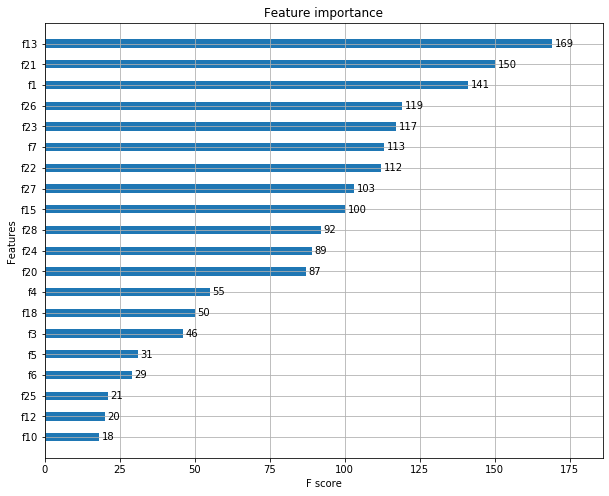

In [81]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize = (10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

이제부터는 LightGBM을 이용해 모델을 학습하고 하이퍼 파라미터를 튜닝해 예측 성능을 평가해보겠다.

In [82]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evlas = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose = True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average = 'macro')
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.95437	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.986486	valid_0's binary_logloss: 0.507451
[3]	valid_0's auc: 0.987539	valid_0's binary_logloss: 0.458489
[4]	valid_0's auc: 0.987715	valid_0's binary_logloss: 0.417481
[5]	valid_0's auc: 0.985609	valid_0's binary_logloss: 0.385507
[6]	valid_0's auc: 0.987188	valid_0's binary_logloss: 0.355773
[7]	valid_0's auc: 0.989645	valid_0's binary_logloss: 0.329587
[8]	valid_0's auc: 0.98789	valid_0's binary_logloss: 0.308478
[9]	valid_0's auc: 0.990172	valid_0's binary_logloss: 0.285395
[10]	valid_0's auc: 0.98947	valid_0's binary_logloss: 0.267055
[11]	valid_0's auc: 0.990172	valid_0's binary_logloss: 0.252013
[12]	valid_0's auc: 0.991927	valid_0's binary_logloss: 0.237018
[13]	valid_0's auc: 0.991225	valid_0's binary_logloss: 0.224756
[14]	valid_0's auc: 0.989821	valid_0's binary_logloss: 0.213383
[15]	valid_0's auc: 0.990523	valid_0's binary_logloss:

In [83]:
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves' : [32, 64],
         'max_depth' : [128, 160],
         'min_child_samples' : [60, 100],
         'subsample' : [0.8, 1]}

gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv = 3)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = 'auc', 
           eval_set = [(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터 :', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average = 'macro')
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.957878	valid_0's binary_logloss: 0.596093	valid_1's auc: 0.960337	valid_1's binary_logloss: 0.57101
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.969898	valid_0's binary_logloss: 0.539611	valid_1's auc: 0.969112	valid_1's binary_logloss: 0.519711
[3]	valid_0's auc: 0.971163	valid_0's binary_logloss: 0.493456	valid_1's auc: 0.969112	valid_1's binary_logloss: 0.477893
[4]	valid_0's auc: 0.984051	valid_0's binary_logloss: 0.450662	valid_1's auc: 0.984907	valid_1's binary_logloss: 0.43452
[5]	valid_0's auc: 0.984469	valid_0's binary_logloss: 0.416605	valid_1's auc: 0.986837	valid_1's binary_logloss: 0.400712
[6]	valid_0's auc: 0.988959	valid_0's binary_logloss: 0.384255	valid_1's auc: 0.990172	valid_1's binary_logloss: 0.372059
[7]	valid_0's auc: 0.987755	valid_0's binary_logloss: 0.359017	valid_1's auc: 0.988592	valid_1's binary_logloss: 0.350451
[8]	valid_0's auc: 0.988816	valid_0's binary_logloss: 0.333665	valid_1's auc: 0.989294	

In [84]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, subsample = 0.8, min_child_samples=100, max_depth=128)

evlas = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose = True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average = 'macro')
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.954721	valid_0's binary_logloss: 0.57241
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.961741	valid_0's binary_logloss: 0.521824
[3]	valid_0's auc: 0.975781	valid_0's binary_logloss: 0.47769
[4]	valid_0's auc: 0.982099	valid_0's binary_logloss: 0.437405
[5]	valid_0's auc: 0.982976	valid_0's binary_logloss: 0.405489
[6]	valid_0's auc: 0.984029	valid_0's binary_logloss: 0.378009
[7]	valid_0's auc: 0.98596	valid_0's binary_logloss: 0.354405
[8]	valid_0's auc: 0.986486	valid_0's binary_logloss: 0.329984
[9]	valid_0's auc: 0.986486	valid_0's binary_logloss: 0.309991
[10]	valid_0's auc: 0.987364	valid_0's binary_logloss: 0.291926
[11]	valid_0's auc: 0.989645	valid_0's binary_logloss: 0.275664
[12]	valid_0's auc: 0.988943	valid_0's binary_logloss: 0.263267
[13]	valid_0's auc: 0.989996	valid_0's binary_logloss: 0.251367
[14]	valid_0's auc: 0.989645	valid_0's binary_logloss: 0.240974
[15]	valid_0's auc: 0.989645	valid_0's binary_logloss:

## 09. 분류 실습 - 캐글 신용카드 사기 검출

해당 데시터 세트의 레이블인 Class속성이 매우 불균형한 분포를 가지고 있다. 0은 정상적인 트랜잭션 데이터, 1은 신용카드 사기 트랜잭션을 의미한다.<br>
하지만, 전체 데이터의 약 0.172%만이 레이블값 1을 가지고 있다. 

이처럼 레이블이 분균형한 분포를 가진 데이터 세트를 학습시킬때는 예측 성능의 문제가 발생할 수 있다. 제대로 다양한 유형을 학습하지 못하는 반면에 정상 레이블을 가지는 데이터 건수는 매우 많기 때문에 일방적으로 정상 레이블로 치우쳐진 학습을 수행해 제대로 된 이상 데이터 검출이 어려워질 수 있다.

이를 해결하기 위해서는 대표적으로 오버샘플링, 언더샘플링 방법이 있고, 대체적으로 오버샘플링 방식이 예측 성능상 더 유리하다.

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('datasets/creditcard.csv')
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Time피처의 경우는 작업용 속성으로서 큰 의미가 없기에 제거한다.

In [86]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

결측값이 없음을 알 수 있다. 또한 class레이블만 int형이고 나머지 피처들은 모두 float형임을 알 수 있다.

In [88]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis = 1, inplace = True)
    return df_copy

다음과 같이 Time피처를 제거하는 함수를 생성하였다.

In [90]:
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    
    X_train, X_test, y_train, y_test = \
                    train_test_split(X_features, y_target, test_size = 0.3, random_state = 0, stratify = y_target)
        
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

다음은 get_preprocessed_df를 호출한 뒤 학습피처와 레이블 데이터 세트, 테스트 피처, 레이블 데이터 세트를 반환하는 함수이다.

In [100]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts() / y_train.count() * 100)
print('\n테스트 데이터 레이블 값 비율')
print(y_test.value_counts() / y_test.count() * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64

테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


큰 차이 없이 학습 데이터 레이블과 테스트 데이터 레이블이 잘 분할되었음을 확인할 수 있다.

로지스틱회귀와 LightGBM 기반의 모델이 데이터 가공을 수행하면서 예측 성능이 어떻게 변하는지 살펴볼 것이다. 우선 로지스틱 회귀부터 보겠다.

In [102]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85279    16]
 [   59    89]]
정확도: 0.9991, 정밀도: 0.8476, 재현율: 0.6014,    F1: 0.7036, AUC:0.9547


LightGBM을 이용한 모델을 만들기 전에, 학습/예측/평가를 수행할 별도의 함수를 생성한다.

In [103]:
def get_model_train_eval(model, ftr_train = None, ftr_test = None, tgt_train=None, tgt_test = None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [104]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=10000, num_leaves = 64, n_jobs=-1, boost_from_average = False)

get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85290     5]
 [   38   110]]
정확도: 0.9995, 정밀도: 0.9565, 재현율: 0.7432,    F1: 0.8365, AUC:0.9775


여기서 boost_from_average = False로 설정한 이유는, 본 데이터 세트가 불균형한 레이블 값 분포도를 가지고 있기 때문이다.

앞의 로지스틱 회귀보다 높은 수치를 보인다.

다음은 왜곡된 분포도를 가지는 데이터의 재가공 과정을 거친 후 다시 테스트해 보는 과정이다.

정상/사기 트랜잭션을 결정하는데 있어서 Amount피처가 매우 중요한 속성일 가능성이 높기 때문에 그 분포를 확인해보겠다.

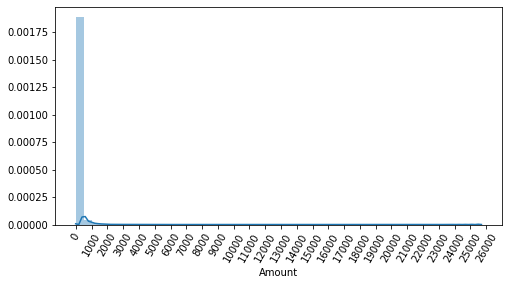

In [105]:
import seaborn as sns
plt.figure(figsize = (8, 4))
plt.xticks(range(0, 30000, 1000), rotation = 60)
sns.distplot(card_df['Amount'])

Amount를 표준 정규분포 형태로 변환한 뒤에 로지스틱 회귀의 예측 성능을 평가해보겠다.

In [106]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))

    df_copy.insert(0, 'Amount_Scaled', amount_n)

    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [108]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('\n### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9702

### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500,    F1: 0.8409, AUC:0.9779


Amount피처값을 정규분포형태로 변환하였지만 성능이 크게 개선되지는 않았다.<br>
이번에는 로그 변환을 수행한다. 이는 데이터 분포도가 심하게 왜곡되어 있을 경우 적용하는 기법 중 하나이다. 

In [110]:
def get_preprocessed_df(df=None):
    df_copy = df.copy() 
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [111]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,    F1: 0.8496, AUC:0.9796


두 모델 모두에서 재현율, ROC-AUC에서 성능이 약간씩 개선되었음을 볼 수 있다. 

우리는 이상치 데이터를 제거한 후 모델을 학습하고 예측, 평가하는 방법을 배울 것이다. 이상치 데이터를 검출하는데 있어서는 IQR에 1.5를 곱해 생성된 범위를 이용해 최댓값을 초과하거나 최솟값에 미달하는 데이터를 이상치로 간주한다.

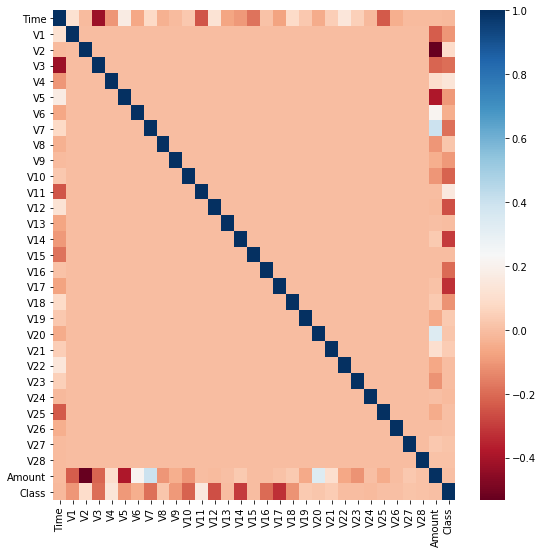

In [112]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

다음과 같이 상관관계를 보이는 이유는, 결정값과 가장 상관성이 높은 피처들을 위주로 이상치를 검출하는 것이 효율적이기 때문이다.

Class피처와 음의 상관관계가 가장 높은 피처는 V14와 V17이다. 이 중에서 V14에 대해서만 이상치를 찾아 제거해보겠다.

In [113]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [114]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


위에서는 이상치 데이터의 인덱스를 찾아내는 함수였다. 아래에서는 이를 삭제하는 로직을 get_processed_df()함수에 추가해 데이터를 가공한 뒤에 예측 성능을 체크해볼 것이다.

In [115]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288,    F1: 0.8897, AUC:0.9780


이상치 데이터를 제거한뒤, 두개의 모델 모두에서 예측 성능이 크게 향상되었음을 볼 수 있다.

이번에는 SMOTE 오버 샘플링을 적용한 후 모델의 학습/예측/평가를 보일 것이다. <br>
여기서 우리가 주의해야할것은 오버 샘플링을 적용할때 학습 데이터 세트만 오버 샘플링을 해야 한다는 것이다. 

In [125]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

AttributeError: 'SMOTE' object has no attribute '_validate_data'

In [ ]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [ ]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

## 10. 스태킹 앙상블 

스태킹은 개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출한다는 점에서 배깅과 부스팅과는 공통점을 가지고 있다. <br>
하지만, 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행한다는 점에서 가장 큰 차이가 존재한다.

In [126]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train , X_test , y_train , y_test = train_test_split(X_data , y_label , test_size=0.2 , random_state=0)

In [127]:
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

lr_final = LogisticRegression(C=10)

스태킹에 사용되는 개별 모델은 KNN, 랜덤 포레즈스트, 결정 트리, 에이다부스트이고, 이들 모델의 예측 결과를 합한 데이터 세트로 학습 및 예측을 수행하는 최종 모델은 로지스틱 회귀이다.

In [128]:
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [129]:
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f} :'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도: 0.9561 :


각각의 모델에 대해 학습을 진행하고, predict하여 accuracy_score을 도출하면 다음과 같다.

In [130]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [131]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , final)))

최종 메타 모델의 예측 정확도: 0.9737


개별 모델보다 정확도가 향상된 결과를 볼 수 있다.

다음으로는 과적합을 개선하기 위한 CV세트 기반의 스태킹 모델을 살펴보겠다.

앞의 모델의 경우에는 최종 학습에 있어서 레이블 데이터 세트로 학습 데이터가 아닌 테스트용 레이블 데이터 세트를 사용하였기 때문에 과적합 문제가 발생가능하다.

In [134]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [135]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [136]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [137]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)
 
print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737
